In [17]:
#Basic imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx

In [18]:
#scikit-tda imports.       Install all with -> pip install scikit-tda
#this is the main persistence computation tool
import ripser
import persim

In [19]:
#teaspoon imports.         Install all with -> pip install teaspoon
#this is used to generate data and draw nice pics
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

# Computing persistence on a point cloud

Basic version: point clouds in $\mathbb{R}^n$ with Euclidean metric

# Annulus example

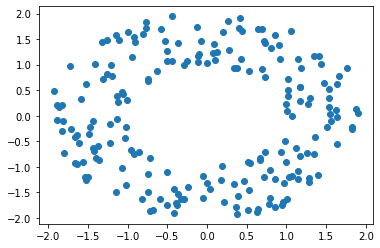

In [20]:
r = 1
R = 2
P = makePtCloud.Annulus(N=200, r=r, R=R, seed=None) #teaspoon data generation
plt.scatter(P[:,0],P[:,1])
# print(P)
# print(type(P))
# print(P.shape)

In [21]:
# Ignore me - I'm here just to draw nice pics

def drawTDAtutorial(P,diagrams,R=2):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    
    #Draw point cloud
    plt.sca(axes[0])
    plt.title('Point Cloud')
    plt.scatter(P[:,0],P[:,1])
    
    #Draw diagrams
    plt.sca(axes[1])
    plt.title('0-dim Diagram')
    Draw.drawDgm(diagrams[0])
    
    plt.sca(axes[2])
    plt.title('1-dim Diagram')
    Draw.drawDgm(diagrams[1])
    plt.axis([0,R,0,R])

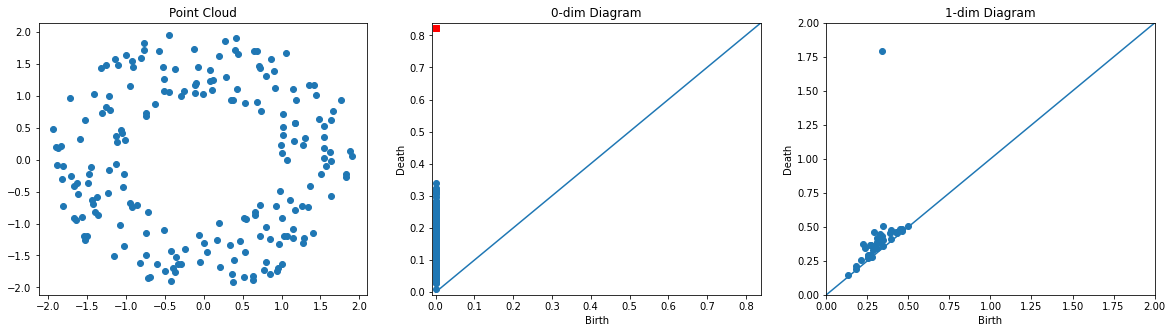

In [22]:
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams)

# Double annulus example

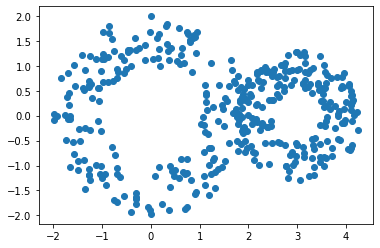

In [24]:
# Make a double annulus
def DoubleAnnulus(r1, R1, r2, R2, xshift):
    P=makePtCloud.Annulus(r=r1,R=R1)
    Q=makePtCloud.Annulus(r=r2,R=R2)
    Q[:,0]=Q[:,0] + xshift
    P=np.concatenate((P,Q))
    return(P)

P = DoubleAnnulus(r1=1, R1=2, r2=.5, R2=1.3, xshift=3)
plt.scatter(P[:,0],P[:,1])

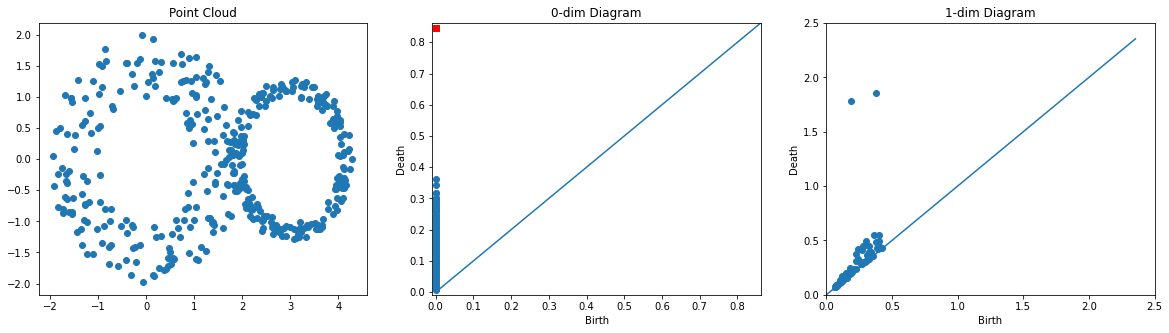

In [25]:
P = DoubleAnnulus(r1=1, R1=2, r2=1, R2=1.3, xshift=3)
diagrams = ripser.ripser(P)['dgms']

drawTDAtutorial(P,diagrams,R=2.5)

# Computing persistence for a weighted graph

Given a weighted graph $G$, get a filtration by keeping all edges with value $\leq a$ and computing the clique complex.

# Small example

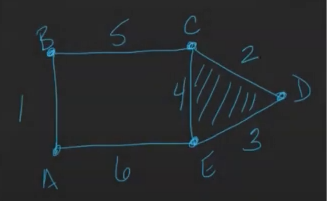

In [26]:
from IPython.display import Image
Image("weighted graph.png")

In [28]:
# Generate distance matrix for the example
D = np.array([[0, 1, np.inf, np.inf, 6], [0, 0, 5, np.inf, np.inf], [0, 0, 0, 2, 4], [0, 0, 0, 0, 3], [0, 0, 0, 0, 0]])
D = D+D.T
print(D)

[[ 0.  1. inf inf  6.]
 [ 1.  0.  5. inf inf]
 [inf  5.  0.  2.  4.]
 [inf inf  2.  0.  3.]
 [ 6. inf  4.  3.  0.]]


In [29]:
diagrams = ripser.ripser(D, distance_matrix=True, maxdim=1)['dgms']
print('0-dim Diagram')
print(diagrams[0])
print('1-dim Diagram')
print(diagrams[1])

0-dim Diagram
[[ 0.  1.]
 [ 0.  2.]
 [ 0.  3.]
 [ 0.  5.]
 [ 0. inf]]
1-dim Diagram
[[ 6. inf]]


# Bigger example: Erdos-Renyi random graph

In [30]:
# Ignore me - I'm here just to draw the graph

def drawGraphEx(G):
    
    pos = nx.spring_layout(G) #position for all nodes
    
    #nodes
    nx.draw_networkx_nodes(G, pos, node_size=70)
    
    #edges
    nx.draw_networkx_edges(G, pos, width=2)
    edge_labels=nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'weight'))

There are 11 edges.


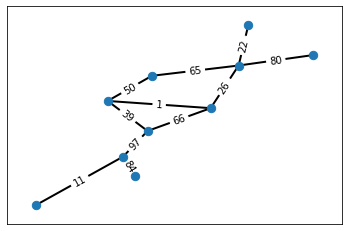

In [36]:
n = 10
p = .3

#Generate random graph
G = nx.erdos_renyi_graph(n,p,seed=None,directed=False)

m=len(G.edges)
print('There are', m,'edges.')

#Generate random edge weights in the interval [0, maxWeight]
maxWeight = 100
weights = np.random.randint(maxWeight, size = m)

for i, e in enumerate(G.edges()):
    G[e[0]][e[1]] ['weight']=weights[i]

drawGraphEx(G)

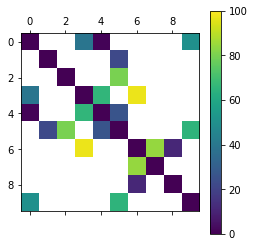

In [37]:
A = nx.adjacency_matrix(G, weight = 'weight')
A = A.todense() #turn into dense matrix for ease of messing with it
A = np.array(A) #apparently I need to hand scikit-tda an array instead of a matrix
A = A.astype('float64') #needed to let me put np.inf
A[np.where(A == 0)] = np.inf
np.fill_diagonal(A,0)

im = plt.matshow(A, vmax = 100) #np.inf values show up as white
plt.colorbar(im)

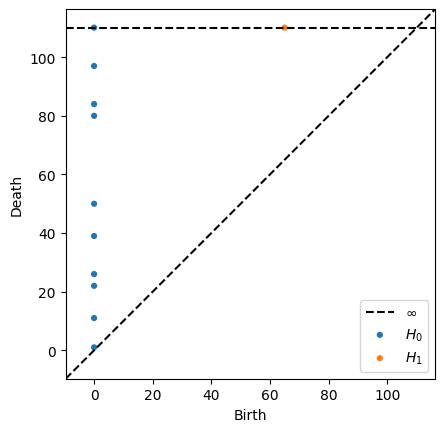

In [40]:
diagrams = ripser.ripser(A, distance_matrix=True)['dgms']
persim.plot_diagrams(diagrams)
#print(diagrams)